## Model 3: XGBoost on the Binary Labels

In [1]:
# Import libraries
import xgboost as xgb
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import learning_curve, GridSearchCV
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
# Import data
df = pd.read_csv('binary_for_models.csv')
df.head()

,Unnamed: 0,amount_tsh,days_since_recorded,funder,gps_height,installer,basin,population,public_meeting,scheme_management,permit,construction_year,extraction_type_class,payment_type,water_quality,quantity,source,waterpoint_type,status_group
0,0,6000.0,995,other,1390,other,Lake Nyasa,109,True,VWC,False,1990s,gravity,annually,soft,enough,spring,communal standpipe,functional
1,1,0.0,272,other,1399,other,Lake Victoria,280,unknown,other,True,2010s,gravity,never pay,soft,insufficient,rainwater harvesting,communal standpipe,functional
2,2,25.0,281,other,686,other,Pangani,250,True,VWC,True,2000s,gravity,per bucket,soft,enough,dam,communal standpipe multiple,functional
3,3,0.0,309,unicef,263,other,Ruvuma / Southern Coast,58,True,VWC,True,1980s,submersible,never pay,soft,dry,machine dbh,communal standpipe multiple,needs repair
4,4,0.0,874,other,0,other,Lake Victoria,0,True,other,True,unknown,gravity,never pay,soft,seasonal,rainwater harvesting,communal standpipe,functional


In [4]:
df = df.drop('Unnamed: 0', axis=1)

In [5]:
# Splitting the target from the features
target = df['status_group']
train_df = df.drop('status_group', axis=1, inplace=False)

In [6]:
# Get dummies
train_df = pd.get_dummies(train_df)
train_df.head()

,amount_tsh,days_since_recorded,gps_height,population,funder_danida,funder_gov,funder_hesawa,funder_kkkt,funder_other,funder_rwssp,...,source_shallow well,source_spring,source_unknown,waterpoint_type_cattle trough,waterpoint_type_communal standpipe,waterpoint_type_communal standpipe multiple,waterpoint_type_dam,waterpoint_type_hand pump,waterpoint_type_improved spring,waterpoint_type_other
0,6000.0,995,1390,109,0,0,0,0,1,0,...,0,1,0,0,1,0,0,0,0,0
1,0.0,272,1399,280,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
2,25.0,281,686,250,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
3,0.0,309,263,58,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0.0,874,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0


In [7]:
scaler=StandardScaler()
scaled_features = scaler.fit_transform(train_df)

X_train, X_test, y_train, y_test = train_test_split(scaled_features, target)

In [8]:
clf = xgb.XGBClassifier()
clf.fit(X_train, y_train)
training_preds = clf.predict(X_train)
val_preds = clf.predict(X_test)
training_accuracy = accuracy_score(y_train, training_preds)
val_accuracy = accuracy_score(y_test, val_preds)

print("Training Accuracy: {:.4}%".format(training_accuracy*100))
print("Validation Accuracy: {:.4%}".format(val_accuracy))

Training Accuracy: 76.08%
Validation Accuracy: 76.0673%


In [9]:
print(classification_report(y_test, val_preds))

              precision    recall  f1-score   support

  functional       0.72      0.91      0.81      8073
needs repair       0.84      0.58      0.69      6777

    accuracy                           0.76     14850
   macro avg       0.78      0.75      0.75     14850
weighted avg       0.78      0.76      0.75     14850



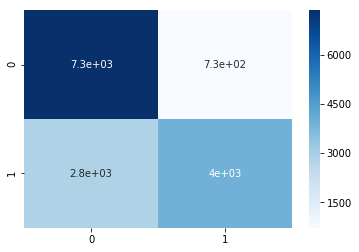

In [10]:
sns.heatmap(confusion_matrix(y_test, val_preds), annot=True, cmap='Blues')